In [141]:
#import dependencies 
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from collections import Counter
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.preprocessing import MinMaxScaler, Imputer

from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

-import training and test
-clean training
-feature selection
-outlier removal 
-train test split
-logistic regression
-random forest 
-gradient boosting
-XGB 
-save f scores for all

In [142]:
#import data
training = pd.read_csv("training dataset.csv", sep=',') 
scoring = pd.read_csv("scoring dataset.csv", sep=',') 

In [76]:
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(scoring[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()   

C:\Users\Johnny\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


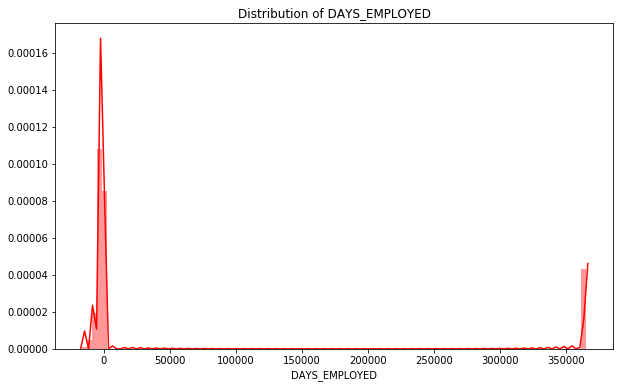

In [77]:
plot_distribution('DAYS_EMPLOYED','red')

In [143]:
#match training and test columns
train_columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'DAYS_EMPLOYED_ANOM']

scoring = scoring[train_columns]

KeyError: "['DAYS_EMPLOYED_ANOM'] not in index"

In [93]:
#drop_na
scoring_dropped = scoring.dropna()

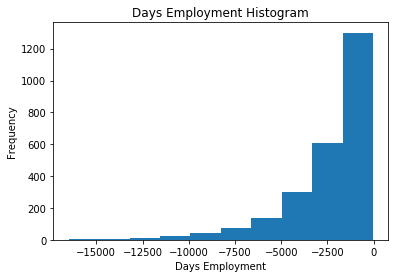

In [79]:
# Create an anomalous flag column
scoring['DAYS_EMPLOYED_ANOM'] = scoring["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
scoring['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

scoring['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [100]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_b_distribution_comp(var,nrow=2):
    
    i = 0
    t1 = training.loc[training['TARGET'] != 0]
    t0 = training.loc[training['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

In [105]:
training.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

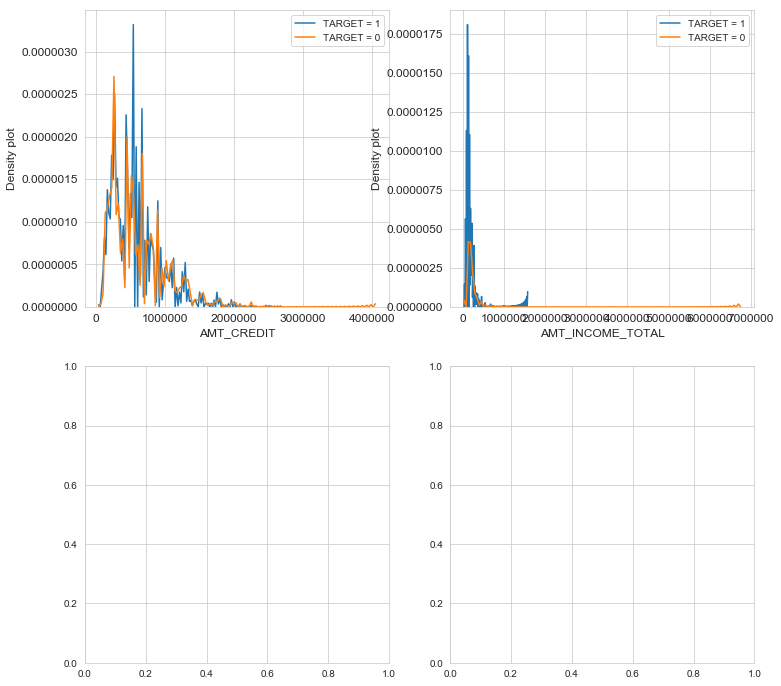

In [106]:
var = ['AMT_CREDIT','AMT_INCOME_TOTAL']

plot_b_distribution_comp(var, nrow=2)

In [4]:
#nans
non_na = training.apply(lambda x: x.count(), axis=0)

#list non nas per column
non_na = non_na.to_frame().reset_index()

#list of columns with less than 40000 complete values
non_na
non_na.sort_values(by = [0], axis=0, ascending=True)

test = (non_na[0] < 30000)
non_na_sub = non_na[test]

In [145]:
#list of columns with missing data
missing_val_cols = non_na_sub["index"]
missing_val_cols = list(missing_val_cols)

#drop columns with missing values
training_dropped = training.drop(columns = missing_val_cols, axis = 0)

In [146]:
# Create an anomalous flag column
training_dropped['DAYS_EMPLOYED_ANOM'] = training_dropped["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
training_dropped['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

training_dropped['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

KeyError: 'DAYS_EMPLOYED'

In [7]:
#drop_na
training_dropped = training_dropped.dropna()

In [113]:
#drop ID col
training_dropped = training_dropped.drop('SK_ID_CURR', axis=1)

In [136]:
# columns=training_dropped.columns.values.tolist()

# X=[columns[i] for i in important_col_list]

# training_dropped = training_dropped[X]
# scoring = scoring[X]

[2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31]

In [137]:
print(training_dropped.shape)
print(scoring.shape)

(25303, 30)
(3000, 30)


Random under-sampling:
1    2150
0    2150
Name: TARGET, dtype: int64


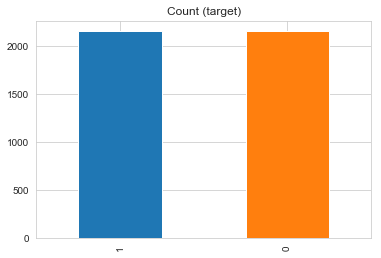

In [115]:
#undersampling

#class counts
count_class_0, count_class_1 = training_dropped.TARGET.value_counts()


# Divide by class
df_class_0 = training_dropped[training_dropped['TARGET'] == 0]
df_class_1 = training_dropped[training_dropped['TARGET'] == 1]

#undersample dataframe

df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.TARGET.value_counts())

df_test_under.TARGET.value_counts().plot(kind='bar', title='Count (target)');

In [116]:
#numerical and categorical variables 

all_cols = df_test_under.columns

num_cols = df_test_under._get_numeric_data().columns
print("Numerical columns: ", num_cols)

cat_cols = list( set(all_cols) -  set(num_cols) )
print("Categorical columns: ",cat_cols)

#categorical to numeric
le = LabelEncoder()
for i in cat_cols:
    df_test_under[i] = le.fit_transform(df_test_under[i])

Numerical columns:  Index(['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT

In [117]:
# Remove 'id' and 'target' columns
labels = df_test_under.columns[2:]

X = df_test_under[labels]
y = df_test_under['TARGET']

In [118]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [119]:
# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Repeat with the scaler
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\Johnny\Anaconda4\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype bool, int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [120]:
#first model

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


precision, recall, fscore, support = score(y_test, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

Accuracy: 69.88%
precision: [0.69815668 0.69953052]
recall: [0.70301624 0.69463869]
fscore: [0.70057803 0.69707602]
support: [431 429]


In [121]:
# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

# Train on the training data
random_forest.fit(X_train, y_train)

# Feature names
features = list(X.columns)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(X_test)[:, 1]

#accuracy 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

precision, recall, fscore, support = score(y_test, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


Accuracy: 69.88%
precision: [0.69815668 0.69953052]
recall: [0.70301624 0.69463869]
fscore: [0.70057803 0.69707602]
support: [431 429]


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [122]:
def plot_feature_importances(df):
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

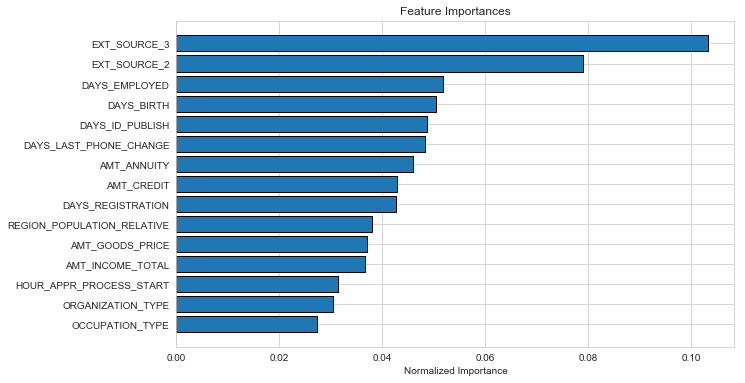

In [123]:
# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importances)

In [149]:
feature_importances_sorted

# important_col_list = []

# for i in range(0,30):
#     x = feature_importances_sorted.iloc[i, 0]
#     important_col_list.append(training_dropped.columns.get_loc(str(x)))

# important_col_list


list(feature_importances_sorted.iloc[:, 1])

['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'DAYS_EMPLOYED',
 'DAYS_BIRTH',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_ANNUITY',
 'AMT_CREDIT',
 'DAYS_REGISTRATION',
 'REGION_POPULATION_RELATIVE',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'HOUR_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'OCCUPATION_TYPE',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'WEEKDAY_APPR_PROCESS_START',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'NAME_FAMILY_STATUS',
 'CNT_FAM_MEMBERS',
 'NAME_EDUCATION_TYPE',
 'NAME_INCOME_TYPE',
 'CODE_GENDER',
 'CNT_CHILDREN',
 'REGION_RATING_CLIENT_W_CITY',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'REGION_RATING_CLIENT',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'FLAG_OWN_CAR',
 'FLAG_PHONE',
 'NAME_TYPE_SUITE',
 'NAME_HOUSING_TYPE',
 'FLAG_OWN_REALTY',
 'FLAG_WORK_PHONE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'REG_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_3',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_8',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_REGION_NOT_WORK_REGION',
 'FLAG_E

In [124]:
# !pip install xgboost
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
grad_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)


# xgboost classifier
xg_clf = xgb.XGBClassifier(objective = 'binary:logistic', n_estimates = 200).fit(X_train, y_train)


train_gb_score = grad_clf.score(X_train, y_train)
test_gb_score = grad_clf.score(X_test, y_test)
train_xgb_score = xg_clf.score(X_train, y_train)
test_xgb_score = xg_clf.score(X_test, y_test)

print("Accuracy score of Gradient Boosting classifier for training set")
print("{:2.4f}".format(train_gb_score))
print("Accuracy score of Gradient Boosting classifier for test set")
print("{:2.4f}".format(test_gb_score))

print("----------------------------------------------------------------")

print("Accuracy score of XGBoost classifier for training set")
print("{:2.4f}".format(train_xgb_score))
print("Accuracy score of XGBoost classifier for testset")
print("{:2.4f}".format(test_xgb_score))

Accuracy score of Gradient Boosting classifier for training set
0.7424
Accuracy score of Gradient Boosting classifier for test set
0.6640
----------------------------------------------------------------
Accuracy score of XGBoost classifier for training set
0.7555
Accuracy score of XGBoost classifier for testset
0.6988


In [51]:
test_dmatrix = xgb.DMatrix(data = X_train, label = y_train)

params = {"objective": "binary:logistic", "max_depth": 5}

cv_results = xgb.cv(dtrain = test_dmatrix, params = params, nfold = 5, num_boost_round = 50, metrics= "error", verbose_eval = None)

print(cv_results)

[12:19:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[12:19:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[12:19:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[12:19:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[12:19:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[12:19:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[12:19:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

In [52]:
test_dmatrix = xgb.DMatrix(data = X_train, label = y_train)

params = {"objective": "binary:logistic", "max_depth": 5}

cv_results = xgb.cv(dtrain = test_dmatrix, params = params, nfold = 5, num_boost_round = 50, metrics= "error", verbose_eval = None)

print(cv_results)

[12:22:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[12:22:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[12:22:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[12:22:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[12:22:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[12:22:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[12:22:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

In [53]:
# L2 regularization parameter
l2_params = [1,10,100]
score_l2 = []

params = {"objective": "reg:logistic", "max_depth": 5}

for i in l2_params:
    params["gamma"] = i
    print(params)
    cv_results = xgb.cv(dtrain = test_dmatrix, params = params, nfold = 5, num_boost_round = 5, 
                        metrics= "error")
    score_l2.append(cv_results["test-error-mean"].tail(1).values[0])

score_l2

{'objective': 'reg:logistic', 'max_depth': 5, 'gamma': 1}
[12:23:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[12:23:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[12:23:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 4 pruned nodes, max_depth=5
[12:23:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[12:23:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[12:23:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 2 pruned nodes, max_depth=5
[12:23:08] C:\Users\Administrator\De

In [55]:
from sklearn.model_selection import GridSearchCV

# Create a parameter grid
param_grid = {'learning_rate':[0.01, 0., 0.5],
             'n_estimators':[5,10],
             'subsample': [0.3, 0.5, 0.9]}

In [57]:
gbm = xgb.XGBClassifier(objective = 'binary:logistic')
grid_score = GridSearchCV(estimator = gbm, param_grid = param_grid)
grid_score.fit(X_train,y_train)

C:\Users\Johnny\Anaconda4\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.01, 0.0, 0.5], 'n_estimators': [5, 10], 'subsample': [0.3, 0.5, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [61]:
print(grid_score.best_params_)
print(grid_score.best_score_)

{'learning_rate': 0.5, 'n_estimators': 10, 'subsample': 0.9}
0.6552325581395348


In [64]:
# Random search: random draws of hyperparameter combinations a set number of times

from sklearn.model_selection import RandomizedSearchCV
test_dmatrix = xgb.DMatrix(data = X_train, label = y_train)

param_grid = {'learning_rate':np.arange(0.05, 1.05, 0.05) ,
             'n_estimators':[5,10],
             'subsample': np.arange(0.05, 1.05, 0.05)}

gbm = xgb.XGBClassifier(objective = 'binary:logistic')
grid_scobre = RandomizedSearchCV(estimator = gbm, param_distributions= param_grid, n_iter = 25)
grid_score.fit(X_train,y_train)

print(grid_score.best_params_)
print(grid_score.best_score_)

C:\Users\Johnny\Anaconda4\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.01, 0.0, 0.5], 'n_estimators': [5, 10], 'subsample': [0.3, 0.5, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

{'learning_rate': 0.5, 'n_estimators': 10, 'subsample': 0.9}
0.6552325581395348
